In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from svm_margin_plot import plot_svm_boundary

In [6]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [7]:
df.head(10)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
5,2.158224,2.745451,1
6,8.172223,7.328995,0
7,8.719652,6.228618,0
8,6.779079,6.630667,0
9,3.043633,4.642650,1


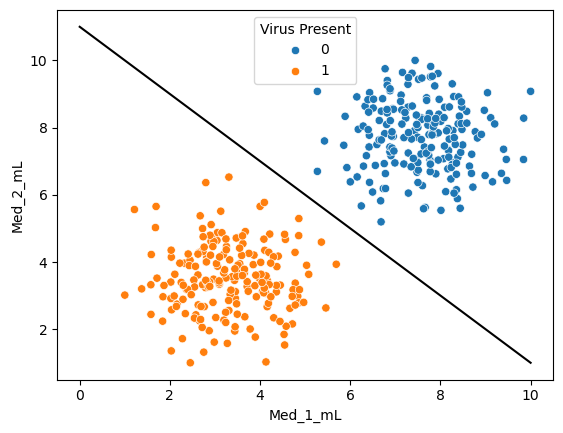

In [8]:
sns.scatterplot(data=df, x="Med_1_mL", y="Med_2_mL", hue="Virus Present")
x = np.linspace(0, 10, 100)
m = -1
b = 11

y = m*x + b
plt.plot(x, y, "black")

In [9]:
from sklearn.svm import SVC

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [11]:
y = df["Virus Present"]
X = df.drop("Virus Present", axis=1)

In [12]:
model = SVC(kernel="linear", C=1000)

In [13]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


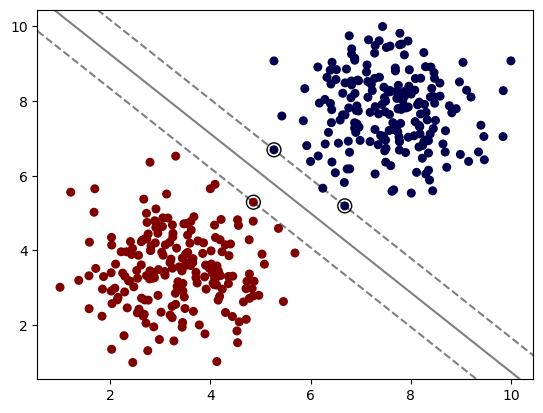

In [14]:
plot_svm_boundary(model, X, y)

In [33]:
model = SVC(kernel="linear", C=0.005)
model.fit(X, y)

SVC(C=0.005, kernel='linear')

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


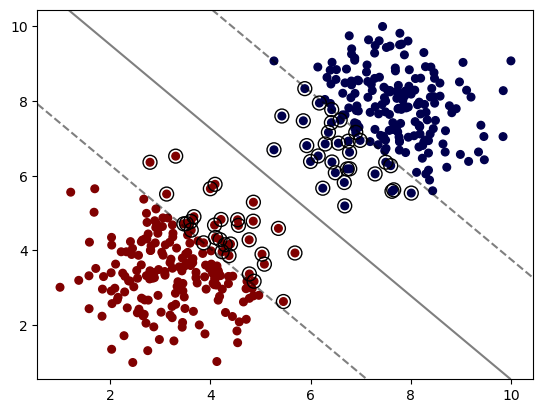

In [35]:
plot_svm_boundary(model, X, y)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


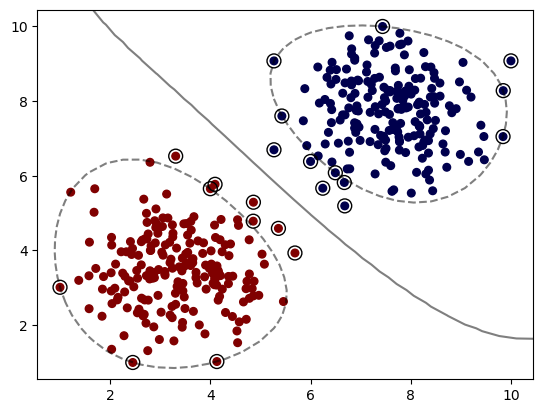

In [81]:
model = SVC(kernel="rbf", C=0.5, gamma="scale")
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


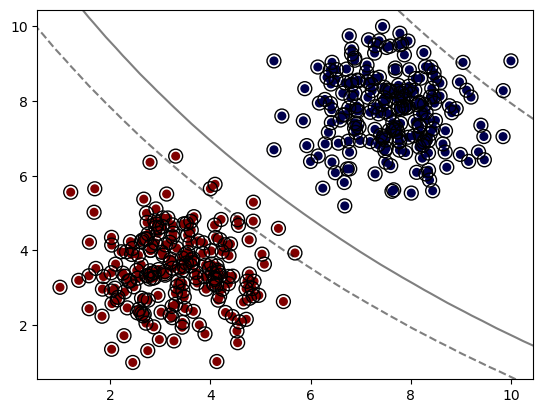

In [83]:
model = SVC(kernel="sigmoid")
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


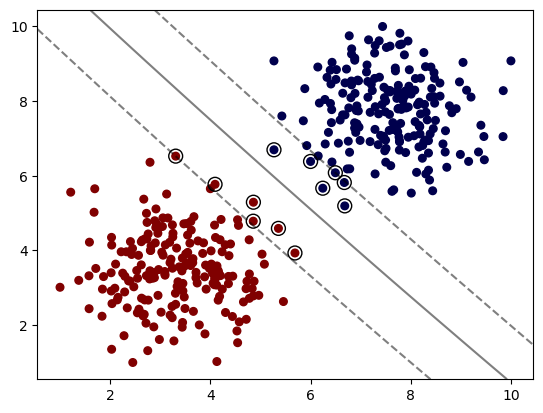

In [99]:
model = SVC(kernel="poly", C=0.05, degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [101]:
from sklearn.model_selection import GridSearchCV

In [119]:
svm = SVC()
param_grid = {"C": [0.01, 0.1, 1], "kernel": ["linear", "rbf"]}

In [121]:
grid = GridSearchCV(svm, param_grid)

In [123]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [125]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [127]:
df = pd.read_csv("../DATA/cement_slump.csv")

In [129]:
df.head(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


<Axes: >

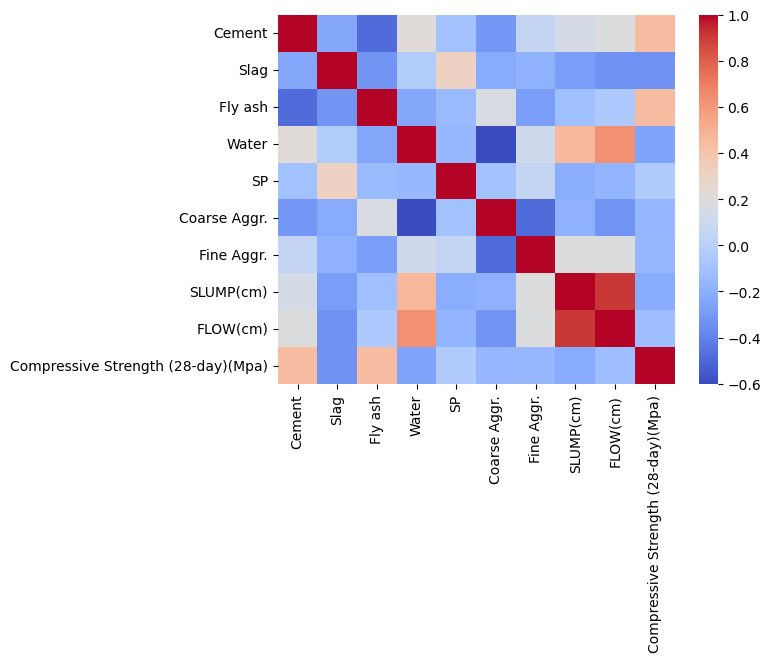

In [133]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

In [135]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [137]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis=1)

In [139]:
y = df["Compressive Strength (28-day)(Mpa)"]

In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [145]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [149]:
scaled_X_train = scaler.fit_transform(X_train)

In [151]:
scaled_X_test = scaler.transform(X_test)

In [153]:
from sklearn.svm import SVR, LinearSVR

In [157]:
base_model = SVR()

In [159]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [161]:
base_predictions = base_model.predict(scaled_X_test)

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
mean_absolute_error(y_test, base_predictions)

5.236902091259179

In [167]:
np.sqrt(mean_squared_error(y_test, base_predictions))

6.695914838327134

In [195]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1], "kernel": ["linear", "rbf", "poly"], "gamma": ["scale", "auto"], "degree": [2, 3, 4], "epsilon": [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5]}

In [171]:
svr = SVR()

In [197]:
grid = GridSearchCV(svr, param_grid)

In [199]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [201]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [203]:
grid_predictions = grid.predict(scaled_X_test)

In [205]:
mean_absolute_error(y_test, grid_predictions)

2.512801221076172

In [207]:
np.sqrt(mean_squared_error(y_test, grid_predictions))

3.178210305119806